# Introduction

This report is based on 98 observations of cars in Europe and the USA. First, it assesses the relationship between and the frequency distribution of the cars' horsepower and fuel economy before and after reaching 75,000 miles. Next, it ascertains whether the gamma and the Weibull distributions fit the observed distribution of horsepower and fuel economy. Lastly, the report provides a set of confidence intervals for the mean horsepower for all cars, the relationship between the average overall gas mileage between European and US cars, and the average of the differences between average mileage before and after cars reach 75,000 miles.

This report will reference the following variables:

In [60]:
/* Print the variables within the data set.
ODS TRACE ON/ODS TRACE OFF was used in SAS Studio to
exclude EngineHost/Attributes and to output only the Position */;

PROC CONTENTS DATA=ST513.USEuropeCars VARNUM;
  ODS SELECT Position;
RUN;

### Horsepower
The horsepower histogram is characterized by unimodal peaks for cars in both Europe and the USA and is slightly skewed right.  


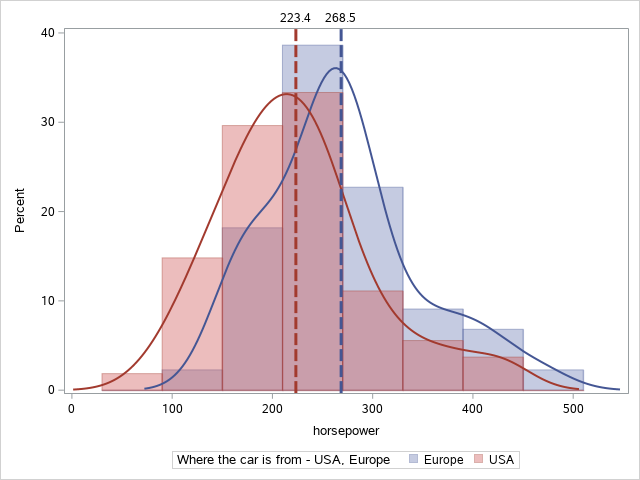

In [61]:
*Histogram for horsepower with different coloring for each region and smoothed density plots;
PROC SGPLOT DATA = ST513.USEuropeCars;
  HISTOGRAM horsepower / GROUP = region
                         TRANSPARENCY = 0.6;
  DENSITY horsepower / GROUP = region
                       TYPE = kernel;
  REFLINE 268.5 / AXIS = x
                 LABEL = "268.5"
                 LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cx445694);
  REFLINE 223.35 / AXIS = x
                  LABEL = "223.4"
                  LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cxA23A2E);
  XAXIS LABEL = "horsepower";
RUN;

### MPG (before 75,000 miles)
The mpg_before histogram displays unimodal peaks and the distribution of European cars is mostly symmetric. The fuel efficiency is slightly skewed left for cars in the USA.  


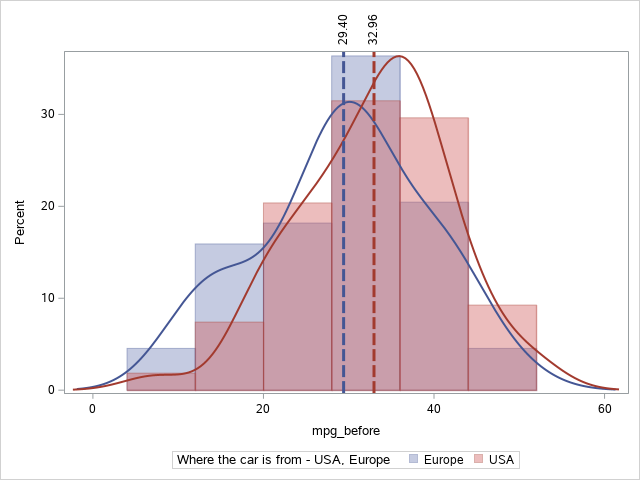

In [62]:
*Histogram for mpg_before;
PROC SGPLOT DATA = ST513.USEuropeCars;
  HISTOGRAM mpg_before / GROUP = region
                         TRANSPARENCY = 0.6;
  DENSITY mpg_before / GROUP = region
                       TYPE = kernel;
  REFLINE 29.4 / AXIS = x
                 LABEL = "29.40"
                 LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cx445694);
  REFLINE 32.96 / AXIS = x
                  LABEL = "32.96"
                  LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cxA23A2E);
  XAXIS LABEL = "mpg_before";
RUN;

### MPG (after 75,000 miles)
Similarly, the mpg_after histogram displays unimodal peaks and the distribution of European cars is mostly symmetric. The fuel efficiency is slightly skewed left for cars in the USA.  


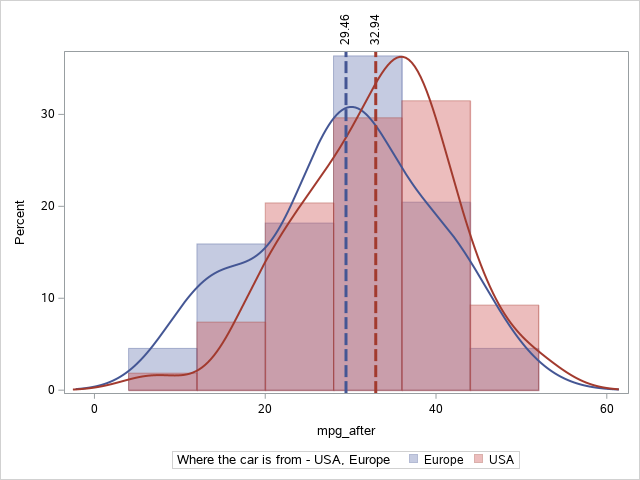

In [63]:
*Histogram for mpg_after;
PROC SGPLOT DATA = ST513.USEuropeCars;
  HISTOGRAM mpg_after / GROUP = region
                         TRANSPARENCY = 0.6;
  DENSITY mpg_after / GROUP = region
                       TYPE = kernel;
  REFLINE 29.46 / AXIS = x
                 LABEL = "29.46"
                 LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cx445694);
  REFLINE 32.94 / AXIS = x
                  LABEL = "32.94"
                  LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cxA23A2E);
  XAXIS LABEL = "mpg_after";
RUN;

### Average MPG
As expected from the mpg_before and the mpg_after histograms, the histogram for average_mpg displays unimodal peaks and the distribution of European cars is mostly symmetric. The fuel efficiency is slightly skewed left for cars in the USA.  


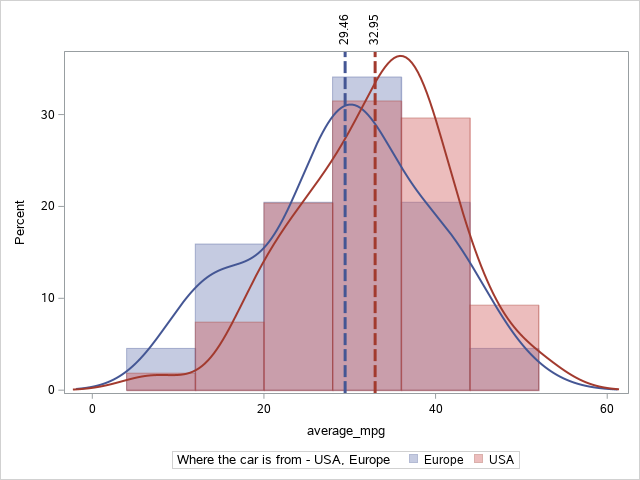

In [64]:
*Histogram for average_mpg;
PROC SGPLOT DATA = ST513.USEuropeCars;
  HISTOGRAM average_mpg / GROUP = region
                         TRANSPARENCY = 0.6;
  DENSITY average_mpg / GROUP = region
                       TYPE = kernel;
  REFLINE 29.46 / AXIS = x
                 LABEL = "29.46"
                 LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cx445694);
  REFLINE 32.95 / AXIS = x
                  LABEL = "32.95"
                  LINEATTRS = (Pattern = 4
                              Thickness = 3
                              Color = cxA23A2E);
  XAXIS LABEL = "average_mpg";
RUN;

### Scatterplots
The scattering of the horsepower and the average_mpg data points, as well as the weakness of correlation coefficient (-0.02), indicate that the horsepower and average_mpg variables do not show a strong linear association.


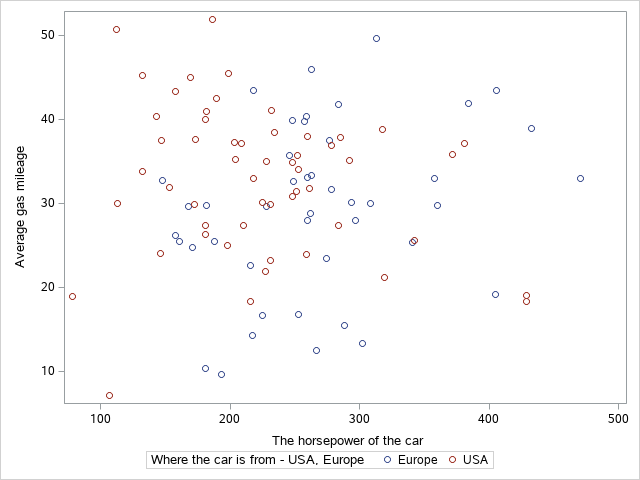

In [65]:
/* Create scatterplots to assess the relationship between the numeric variable. Color
the points by the region variable (check SGSCATTER procedure). */
PROC SGSCATTER DATA=ST513.USEuropeCars;
  PLOT average_mpg*horsepower / GROUP=region;
RUN;

/* Calculate correlation coefficient to measure strength of the linear relationship 
between average_mpg and horsepower */
PROC CORR DATA=ST513.USEuropeCars;
  VAR horsepower average_mpg;
RUN;

# Estimation

### Maximum likelihood
When we have a population of cars, people, or other entities, the sheer size of that population may inhibit us from knowing its parameters (such as the binomial $p$, the normal $\mu$ and $\sigma^2$, or the Poisson $\lambda$). However, we can work with samples from the population. With samples, we can observe outcomes such as the number of successes $Y$ in $N$ independent trials and subsequently estimate the value of the parameter $p$ that maximizes the probability of $Y$ for any given value (e.g. $Y=y=0,1,2,...100$). The function (or the so-called _estimator_) that we use to estimate the parameter remains constant from one sample to another, but the outputs of the function (the _estimates_) usually differ between samples. However, the upside of using the maximum likelihood to estimate parameters is that maximum likelihood estimators are generally _consistent_; that is, with more and more repeated samples (which use an unbiased estimator), the average of our estimates approaches the true value of the population parameter.        

### Gamma distribution and horsepower
The estimated curve below is a Gamma with shape parameter $\alpha=9.56$. In the gamma Q-Q plot, which calculates the shape parameter $\alpha$ using maximum likelihood, the deviation of our sample data from the linear reference line is minimal. This suggests that the gamma distribution is a good model for the horsepower variable.  


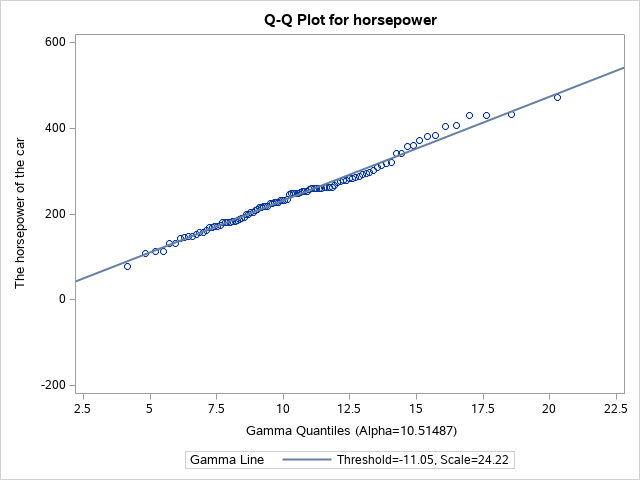
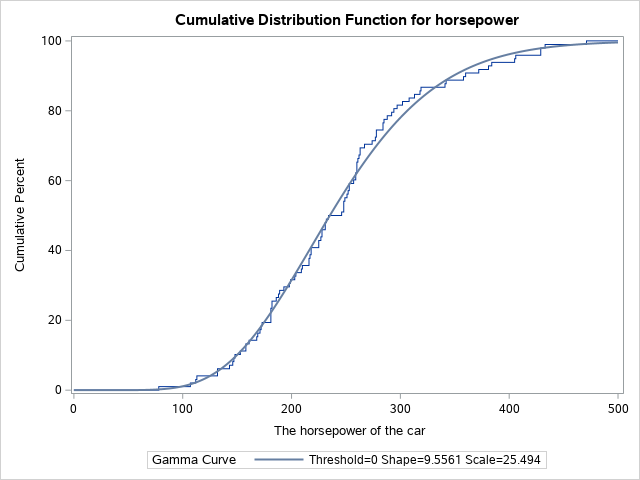

In [66]:
/* Fit a gamma distribution to the horsepower variable.
ODS TRACE ON/ODS TRACE OFF used to control output with ODS SELECT */ 
PROC UNIVARIATE DATA=ST513.USEuropeCars;
      VAR horsepower;
      CDFPLOT / GAMMA;
      QQPLOT / GAMMA(ALPHA=EST THRESHOLD=EST SCALE=EST);
      ODS SELECT QQPlot CDFPlot;
RUN;

### Gamma distribution and mpg_before
The estimated curve for the mpg_before variable is a Gamma with the shape parameter $\alpha=8.89$. However, on the gamma Q-Q plot, the point pattern of our observed data is not linear, which suggests that the gamma distribution is not a good model for the mpg_before variable.  


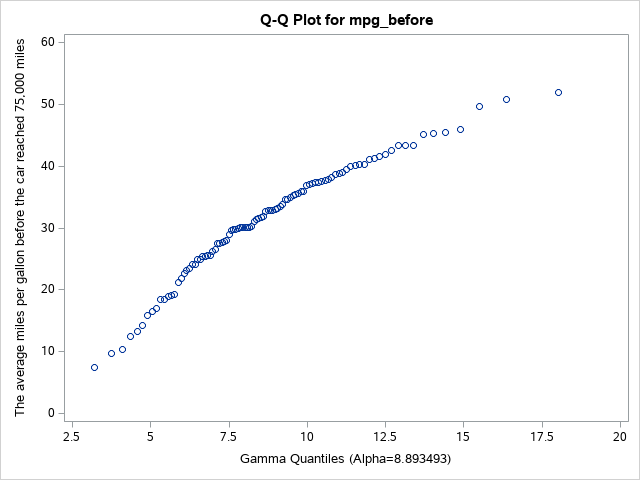
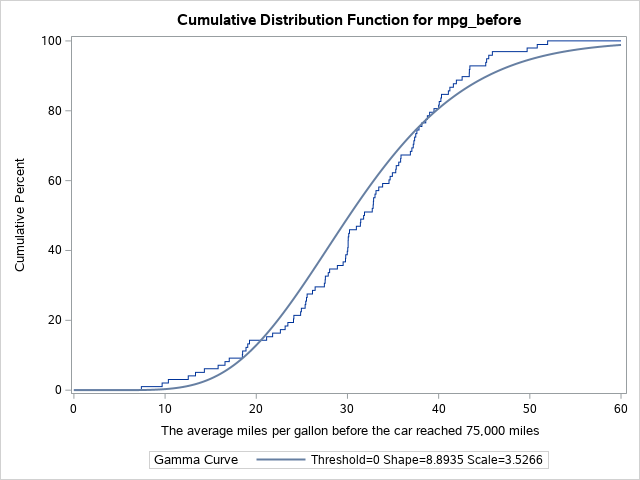

In [67]:
* Fit a gamma distribution to the mpg_before variable;
PROC UNIVARIATE DATA=ST513.USEuropeCars;
      VAR mpg_before;
      CDFPLOT / GAMMA;
      QQPLOT / GAMMA(ALPHA=EST);
      ODS SELECT QQPlot CDFPlot;
RUN;

### Weibull distribution and mpg_before
In lieu of the ill-fitting Gamma, this estimated curve below is a Weibull with the shape parameter $C=3.81$. On the Weibull Q-Q plot, the deviation from the reference line is minimal, which suggests that the Weibull distribution is a better model than the Gamma distribution and a good model overall for the mpg_before variable.  


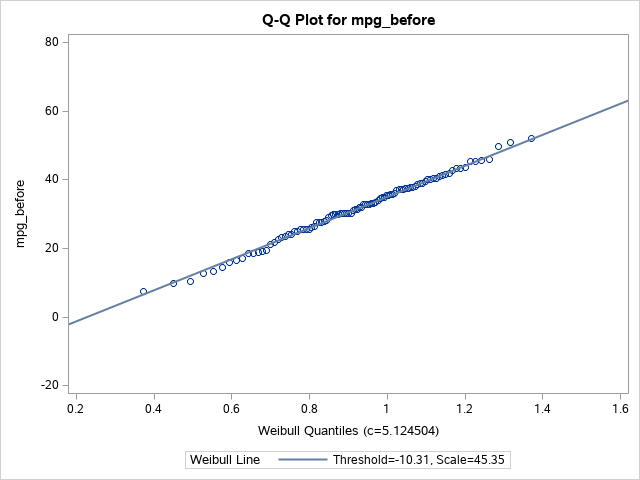
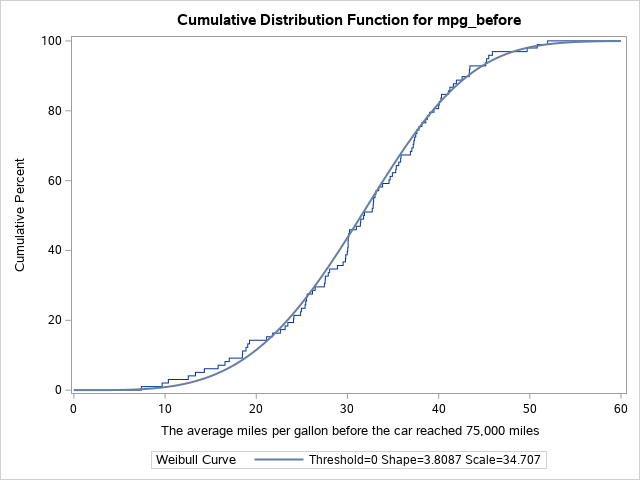

In [68]:
* Fit a weibull distribution to the mpg_before variable;
PROC UNIVARIATE DATA=ST513.USEuropeCars;
      VAR mpg_before;
      CDFPLOT / WEIBULL;
      QQPLOT / WEIBULL(C=EST THRESHOLD=EST SCALE=EST);
      ODS SELECT QQPlot CDFPlot;
RUN;

# Inference
When we repeatedly draw samples of the same size from a population without knowing the population's parameters, we can attempt to capture the parameters by using _intervals_ of numbers (rather than a single number, or a _point estimate_). Moreover, we can be more or less certain (that is, _confident_) that our intervals do, in fact, include the unknown parameter.  

We can quantify our confidence by calculating the lower and the upper _confidence intervals_ within which the parameter lies. Higher confidence, such as 99%, requires larger intervals than a lower confidence, such as 90%. If we take repeated samples and calculate the 95% confidence interval, we can then assert that 95% of those intervals capture the population parameter. More generically, for $(1-\alpha)100\%$ confidence with repeated samples of the same size, we would expect $(1-\alpha)100\%$ of our intervals to include the unknown population parameter.  

### 90% confidence interval
To calculate the 90% confidence interval for the mean horsepower of the cars in our data set, we assume that horsepower is normally distributed and that we do not know the mean $\mu$ nor the standard deviation $\sigma$. Without knowing $\sigma$, we can compute the confidence intervals using the average horsepower $\bar{X}$, the sample estimate $S$, $t_{0.95}$, and a sample size of $n=98$. We assume that our sample of $n=98$ cars was drawn randomly and that the population of cars in Europe and the USA has normally distributed horsepower. With this in mind, our confidence interval can be calculated as 

$$
\bar{X} \pm t_{0.95} \frac{S}{\sqrt{n}} \\
243.62 - 1.66 \frac{79.06}{\sqrt{98}} \approx 230.36 \\
243.62 + 1.66 \frac{79.06}{\sqrt{98}} \approx 256.88
$$

We observed a sample mean horsepower of 243.62 and the 90% confidence interval for the mean horsepower for all cars in our sample is (230.36, 256.88). We do not know whether this interval captures the true parameter, but we are 90% confident that the mean population horsepower is between 230.36 hp and 256.88 hp.  

In [69]:
* Create a 90% confidence interval for the mean horsepower for all cars;
PROC MEANS DATA=ST513.USEuropeCars MEAN CLM STDDEV ALPHA=0.1;
  VAR horsepower;
RUN;

### 95% confidence interval
To calculate the 95% confidence interval for the average gas mileage of cars in Europe in the USA, we only again assume that our sample of 98 cars was drawn randomly and that the population is normally distributed. The approximate linearity of points for average_mpg in the SAS Q-Q plot suggests that the normality assumption is reasonable, and we once again evoke the calculation

$$
\bar{X} \pm t_{0.975} \frac{S}{\sqrt{n}} \\
$$

to estimate our confidence intervals for the average gas mileage of cars in Europe and the USA. For European cars,

$$
29.43 - 2.02 \frac{10.01}{\sqrt{44}} \approx 26.38\\
29.43 + 2.02 \frac{10.01}{\sqrt{44}} \approx 32.48\\
$$

For American cars,

$$
32.95 - 2.00 \frac{8.81}{\sqrt{54}} \approx 30.55\\
32.95 + 2.00 \frac{8.81}{\sqrt{54}} \approx 35.35\\
$$

We observed 29.43 mpg as the average gas mileage for our sample of 44 European cars and calculated a 95% confidence interval for this sample of (26.38, 32.48). We observed a higher average gas mileage of 32.95 mpg for American cars and calculated a 95% confidence interval of (30.55, 35.35). We do not know whether these intervals capture the true average fuel economy of European and American cars, but we are 95% confident that the mean European and American gas mileage is between (26.38, 32.48) and (30.55, 35.35), respectively. 


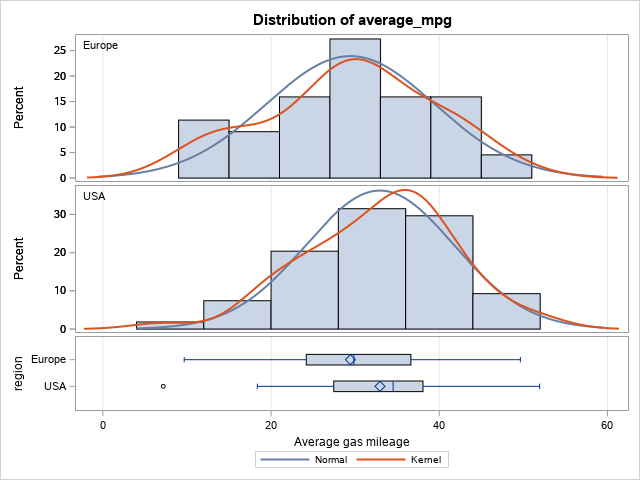
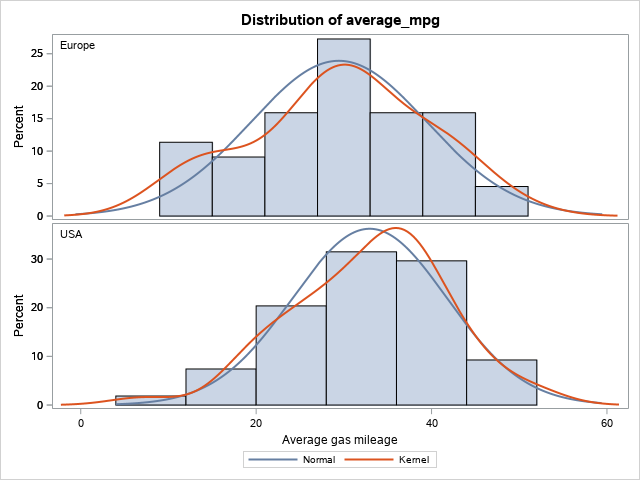
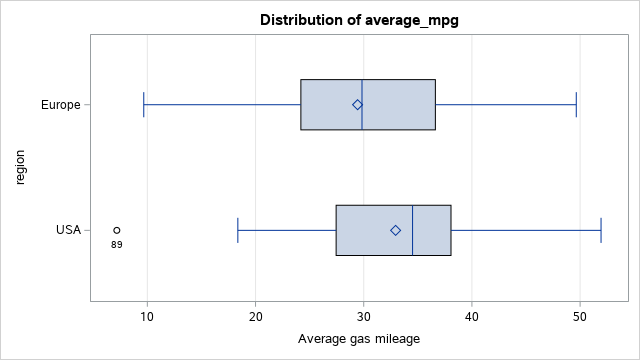
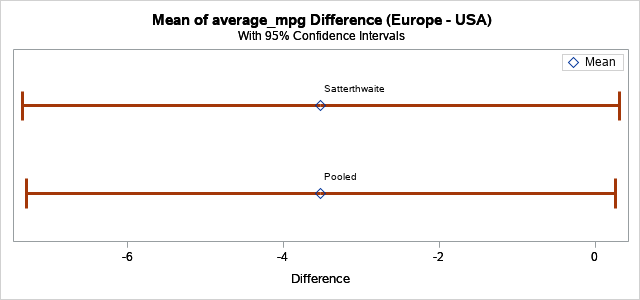
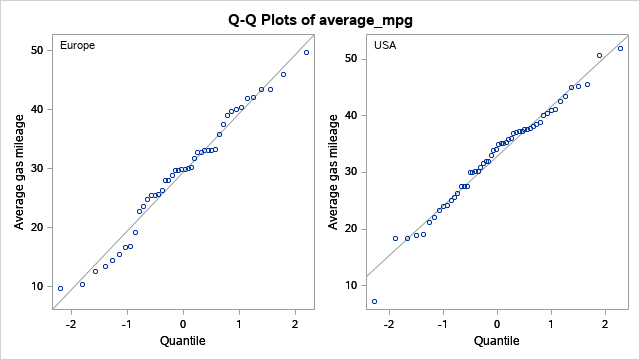

In [70]:
* Create a 95% confidence interval to inspect the relationship between
the average overall gas mileage between European and US cars;
PROC TTEST DATA=ST513.USEuropeCars PLOTS = all;
	CLASS region;
	VAR average_mpg;
RUN;

### 99% confidence interval
We can create a 99% confidence interval to investigate the average of the differences between average fuel economy before and after reaching 75,000 miles. The cars are our unit of measurement and each car was measured twice (mpg_before and mpg_after), which gives us paired data. Moreover, average fuel economies before and after a car reaches 75,000 miles are related and our measurements cannot be treated independently. Moreover, the Q-Q plot is roughly linear, suggesting that the normality assumption is reasonable for the differences between mpg_after and mpg_before. Therefore, to make an inference about the mean of the differences, we can apply the one-sample t-test to the differences. 

The PAIRED statement in PROC TTEST tells us whether the mean different in average gas mileage before and after reaching 75,000 miles differs significantly from 0. In this case, with the 99% confidence interval of (-0.058, 0.082) and $t=0.46$, the t test is not significant and the 75,000-mile threshold does not appear to significantly affect the average fuel economy of vehicles. 


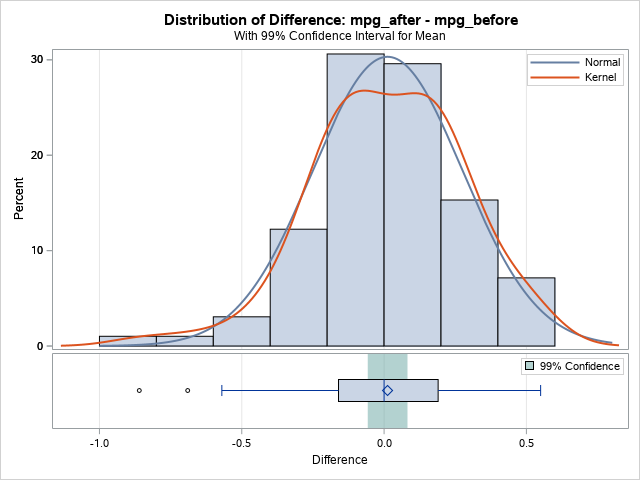
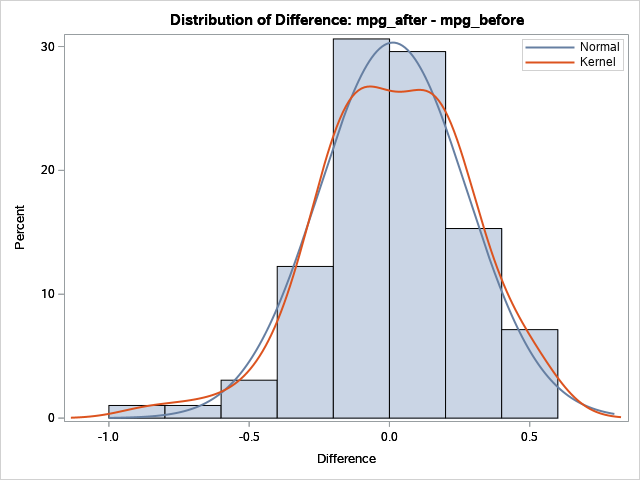
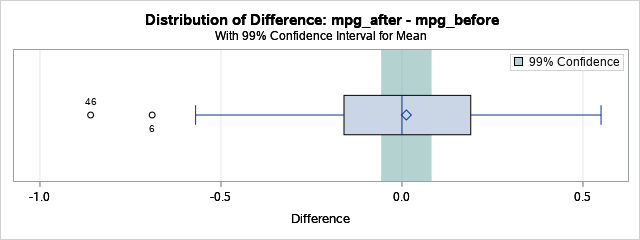
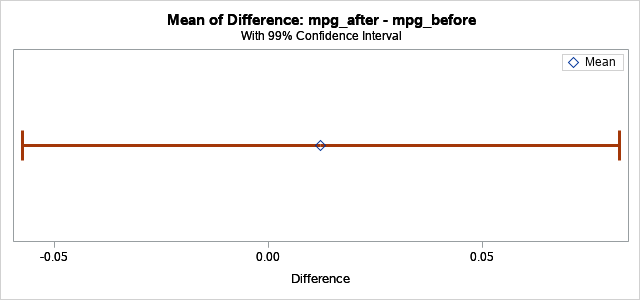
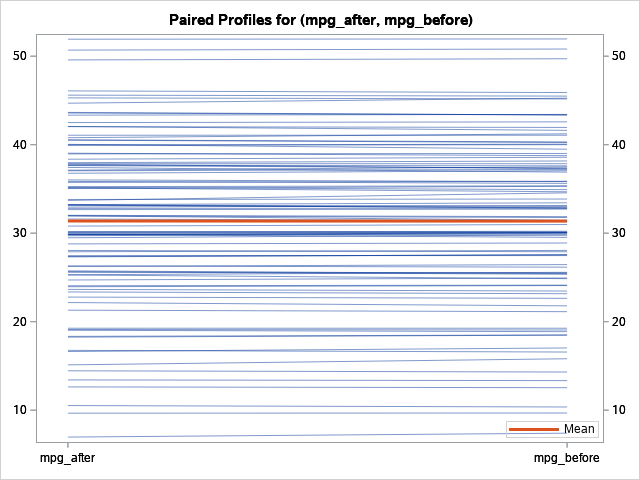
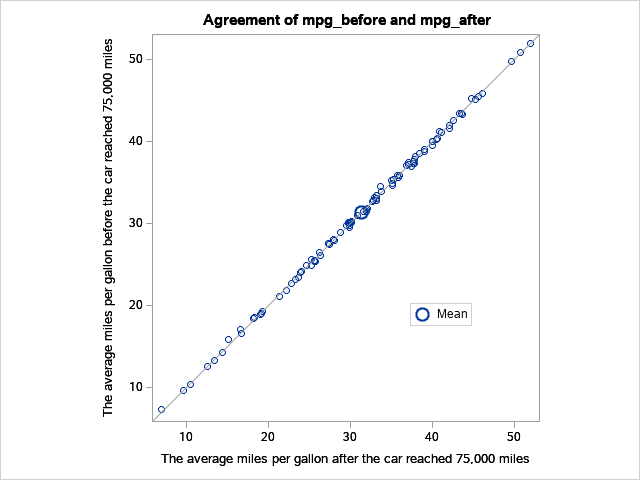
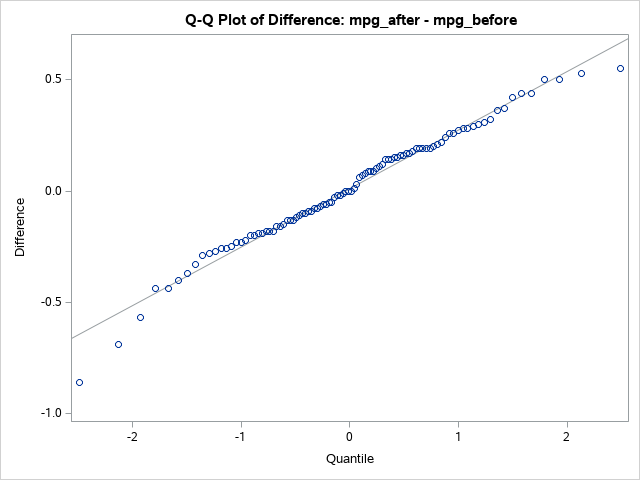

In [71]:
* Create a 99% confidence interval to investigate the average of the
differences between after and before gas mileage;
PROC TTEST DATA=ST513.USEuropeCars PLOTS = all ALPHA=0.01;
	PAIRED mpg_after*mpg_before;
RUN;